In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("titanic.csv", sep=",")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [5]:
data.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


## distribution of target variable

In [6]:
data['survived'].value_counts(normalize=True)

0    0.658035
1    0.341965
Name: survived, dtype: float64

C:\Users\Lisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


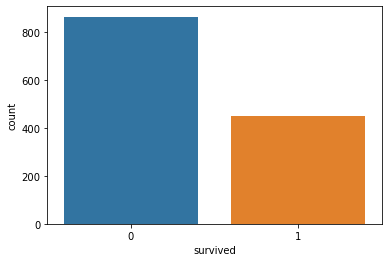

In [8]:
sns.countplot(data['survived'])
plt.show()

## pclass and survived

C:\Users\Lisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


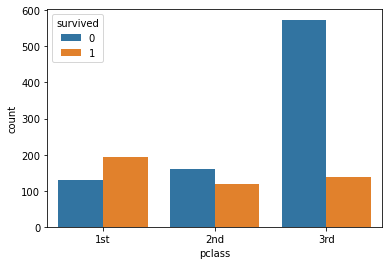

In [10]:
sns.countplot(data['pclass'],hue=data['survived'])
plt.show()

## information in name

In [11]:
data['name'].head(10)

0                       Allen, Miss Elisabeth Walton
1                        Allison, Miss Helen Loraine
2                Allison, Mr Hudson Joshua Creighton
3    Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)
4                      Allison, Master Hudson Trevor
5                                 Anderson, Mr Harry
6                   Andrews, Miss Kornelia Theodosia
7                             Andrews, Mr Thomas, jr
8       Appleton, Mrs Edward Dale (Charlotte Lamson)
9                             Artagaveytia, Mr Ramon
Name: name, dtype: object

In [15]:
data['name_title'] = data['name'].apply(lambda x:x.split(", ")[1] if len(x.split(", ")) > 1 else x.split(",")[0]).apply(lambda x: x.split(" ")[0])

In [16]:
data.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,name_title
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,Miss
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,Miss
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,Mr
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,Mrs
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,Master


In [19]:
data["name_title"].value_counts()

Mr           747
Miss         236
Mrs          200
Master        59
Ms            17
Dr             7
Rev            6
Major          2
Rev.           2
Col            2
Colonel        2
Thomas         2
Nils           1
Sander         1
Eino           1
Albert         1
W.             1
Mansouer       1
Richard        1
Jenny          1
Nikolai        1
Khalil         1
Simon          1
William        1
Seman          1
Rene           1
Oscar          1
Barton         1
Delia          1
Hilda          1
Ernst          1
Berglund.      1
Jacobsohn      1
Mlle.          1
Mlle           1
the            1
Jonkheer       1
Lady           1
Sir            1
Dr.            1
Madame         1
Captain        1
Leo            1
Name: name_title, dtype: int64

In [22]:
data['survived'].groupby(data['name_title']).mean()

name_title
Albert       0.000000
Barton       0.000000
Berglund.    0.000000
Captain      0.000000
Col          0.500000
Colonel      0.500000
Delia        0.000000
Dr           0.428571
Dr.          1.000000
Eino         1.000000
Ernst        0.000000
Hilda        1.000000
Jacobsohn    0.000000
Jenny        0.000000
Jonkheer     0.000000
Khalil       1.000000
Lady         1.000000
Leo          0.000000
Madame       1.000000
Major        0.500000
Mansouer     1.000000
Master       0.389831
Miss         0.588983
Mlle         0.000000
Mlle.        1.000000
Mr           0.144578
Mrs          0.740000
Ms           0.823529
Nikolai      0.000000
Nils         0.000000
Oscar        1.000000
Rene         0.000000
Rev          0.000000
Rev.         0.000000
Richard      0.000000
Sander       0.000000
Seman        0.000000
Simon        0.000000
Sir          1.000000
Thomas       0.000000
W.           0.000000
William      0.000000
the          1.000000
Name: survived, dtype: float64

## length of name

In [23]:
data['name_length'] = data['name'].apply(lambda x:len(x))

In [25]:
data['survived'].groupby(pd.qcut(data['name_length'], 5)).mean()

name_length
(10.999, 17.0]    0.183746
(17.0, 20.0]      0.288321
(20.0, 24.0]      0.285171
(24.0, 28.0]      0.369295
(28.0, 62.0]      0.611111
Name: survived, dtype: float64

## gender

In [27]:
data['sex'].value_counts(normalize=True)

male      0.647372
female    0.352628
Name: sex, dtype: float64

In [28]:
data['survived'].groupby(data['sex']).mean()

sex
female    0.663067
male      0.167059
Name: survived, dtype: float64

## age

In [35]:
data['survived'].groupby(pd.qcut(data['age'], 10)).mean()

age
(0.166, 16.0]    0.652778
(16.0, 19.0]     0.482143
(19.0, 23.0]     0.370370
(23.0, 26.0]     0.333333
(26.0, 30.0]     0.342466
(30.0, 33.0]     0.500000
(33.0, 38.0]     0.484375
(38.0, 45.0]     0.414286
(45.0, 52.0]     0.482143
(52.0, 71.0]     0.406780
Name: survived, dtype: float64

## embark location

In [34]:
data['embarked'].value_counts()

Southampton    573
Cherbourg      203
Queenstown      45
Name: embarked, dtype: int64

In [37]:
data['survived'].groupby(data['embarked']).mean()

embarked
Cherbourg      0.586207
Queenstown     0.311111
Southampton    0.399651
Name: survived, dtype: float64

C:\Users\Lisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


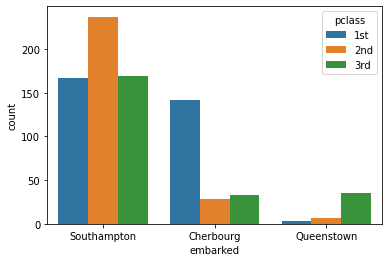

In [39]:
sns.countplot(data['embarked'],hue=data['pclass'])
plt.show()

## desitination

In [42]:
data['survived'].groupby(data['home.dest'].apply(lambda x: str(x).split(",")[-1])).mean()

home.dest
 AB            1.000000
 AZ            0.000000
 Australia     0.000000
 BC            0.250000
 Birmingham    0.000000
                 ...   
Russia         1.000000
Southampton    0.666667
Spain          1.000000
Syria          0.000000
nan            0.180680
Name: survived, Length: 117, dtype: float64

## feature transform

In [49]:
def name(data):
    data['name_len'] = data['name'].apply(lambda x:len(x))
    data['name_title'] = data['name'].apply(lambda x: x.split(", ")[1] if len(x.split(", "))>1 else x.split(", ")[0]).apply(lambda x: x.split(" ")[0])
    del data['name']
    return data

def age(data):
    data['age_flag'] = data['age'].apply(lambda x: 1 if pd.isnull(x) else 0)
    grouped_age = data.groupby(['name_title', 'pclass'])['age']
    data['age'] = grouped_age.transform(lambda x: x.fillna(data['age'].mean()) if pd.isnull(x.mean()) else x.fillna(x.mean()))
    return data

def embark(data):
    data['embarked'] = data['embarked'].fillna('Southampton')
    return data

def dummies(data, columns=['pclass', 'name_title', 'embarked', 'sex']):
    for col in columns:
        data[col] = data[col].apply(lambda x:str(x))
        new_cols = [col + "_" + i for i in data[col].unique()]
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)[new_cols]], axis=1)
        del data[col]
    return data

## preprocessing

In [46]:
drop_columns = ['row.names', 'home.dest', 'room', 'ticket', 'boat']
data = data.drop(drop_columns, axis=1)
data.head()

,pclass,survived,name,age,embarked,sex,name_title,name_length
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,female,Miss,28
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,female,Miss,27
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,male,Mr,35
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,female,Mrs,47
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,male,Master,29


In [50]:
data = name(data)
data = age(data)
data = embark(data)
data = dummies(data)
data.head()

,survived,age,name_length,name_len,age_flag,pclass_1st,pclass_2nd,pclass_3rd,name_title_Miss,name_title_Mr,...,name_title_Simon,name_title_William,name_title_Seman,name_title_Rene,name_title_Leo,embarked_Southampton,embarked_Cherbourg,embarked_Queenstown,sex_female,sex_male
0,1,29.0000,28,28,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,2.0000,27,27,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,30.0000,35,35,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,25.0000,47,47,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0.9167,29,29,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## train model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import tree
trainX, testX, trainY, testY = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size = 0.2, random_state=33)

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [53]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [54]:
measure_performance(testX, testY, model)

Accuracy:0.791 

Classification report
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       164
           1       0.88      0.52      0.65        99

    accuracy                           0.79       263
   macro avg       0.82      0.74      0.75       263
weighted avg       0.81      0.79      0.78       263
 

Confusion matrix
[[157   7]
 [ 48  51]] 



In [55]:
sub_columns = ['age', 'sex_male','sex_female']
sub_trainX = trainX[sub_columns]
sub_testX = testX[sub_columns]
sub_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
sub_model.fit(sub_trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [56]:
measure_performance(sub_testX, testY, sub_model)

Accuracy:0.768 

Classification report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.72      0.64      0.67        99

    accuracy                           0.77       263
   macro avg       0.76      0.74      0.75       263
weighted avg       0.76      0.77      0.77       263
 

Confusion matrix
[[139  25]
 [ 36  63]] 



In [58]:
pd.concat([pd.DataFrame(trainX.columns, columns=['variable']),
         pd.DataFrame(model.feature_importances_, columns=['importance'])],
         axis=1).sort_values(by='importance', ascending=False)[:20]

,variable,importance
53,sex_female,0.553725
6,pclass_3rd,0.252415
0,age,0.095847
4,pclass_1st,0.063084
2,name_len,0.034928
41,name_title_Richard,0.000000
31,name_title_Thomas,0.000000
32,name_title_Hilda,0.000000
33,name_title_Delia,0.000000
34,name_title_Jenny,0.000000
